In [31]:
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce

In [32]:
data=pd.read_csv("Salary Data.csv")
data


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [33]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [34]:
data.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [35]:
data.iloc[150:200,:]
data.iloc[250:300,:]
#Row number 172,260
data.drop(index=[172,260],inplace=True)
data=data.reset_index(drop=True)
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
368,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
369,43.0,Male,Master's,Director of Operations,19.0,170000.0
370,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
371,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [36]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [37]:
data['Gender'].unique(),data['Education Level'].unique(),data['Job Title'].unique()

(array(['Male', 'Female'], dtype=object),
 array(["Bachelor's", "Master's", 'PhD'], dtype=object),
 array(['Software Engineer', 'Data Analyst', 'Senior Manager',
        'Sales Associate', 'Director', 'Marketing Analyst',
        'Product Manager', 'Sales Manager', 'Marketing Coordinator',
        'Senior Scientist', 'Software Developer', 'HR Manager',
        'Financial Analyst', 'Project Manager', 'Customer Service Rep',
        'Operations Manager', 'Marketing Manager', 'Senior Engineer',
        'Data Entry Clerk', 'Sales Director', 'Business Analyst',
        'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
        'Social Media Specialist', 'Software Manager', 'Junior Developer',
        'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
        'Data Scientist', 'Marketing Specialist', 'Technical Writer',
        'HR Generalist', 'Project Engineer', 'Customer Success Rep',
        'Sales Executive', 'UX Designer', 'Operations Director',
        'Net

In [38]:
data['Gender']=data['Gender'].map({'Female':0,'Male':1})
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0,Master's,Data Analyst,3.0,65000.0
2,45.0,1,PhD,Senior Manager,15.0,150000.0
3,36.0,0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
368,35.0,0,Bachelor's,Senior Marketing Analyst,8.0,85000.0
369,43.0,1,Master's,Director of Operations,19.0,170000.0
370,29.0,0,Bachelor's,Junior Project Manager,2.0,40000.0
371,34.0,1,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [39]:
X=data.drop(['Salary'],axis=1)
y=data[['Salary']]
X


,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1,Bachelor's,Software Engineer,5.0
1,28.0,0,Master's,Data Analyst,3.0
2,45.0,1,PhD,Senior Manager,15.0
3,36.0,0,Bachelor's,Sales Associate,7.0
4,52.0,1,Master's,Director,20.0
...,...,...,...,...,...
368,35.0,0,Bachelor's,Senior Marketing Analyst,8.0
369,43.0,1,Master's,Director of Operations,19.0
370,29.0,0,Bachelor's,Junior Project Manager,2.0
371,34.0,1,Bachelor's,Senior Operations Coordinator,7.0


In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=44)
X_train

,Age,Gender,Education Level,Job Title,Years of Experience
83,52.0,1,PhD,Chief Technology Officer,24.0
49,25.0,1,Bachelor's,Help Desk Analyst,0.0
217,29.0,1,Bachelor's,Junior Business Operations Analyst,1.5
256,35.0,1,Bachelor's,Senior Project Coordinator,9.0
181,44.0,0,PhD,Senior UX Designer,15.0
...,...,...,...,...,...
96,47.0,1,PhD,Research Scientist,22.0
59,35.0,1,Master's,Product Manager,7.0
173,26.0,0,Master's,Junior Data Scientist,1.5
241,38.0,0,Bachelor's,Senior Product Manager,10.0


### Target Encoding
As we can see that there are large number of unique values in the column Job Title so we cannot use one hot encoding as it will increase the number of columns a lot as one hot encoding adds (unique-1) more columns into the dataset. Whenever the feature has strong relationship with the target variable we can use the Target Encoding,for this we need to import category encoders as ce and setup
encoder=ce.TargetEncoder(cols=[])

In [41]:
encoder=ce.TargetEncoder(cols=['Job Title'])
X_train=encoder.fit_transform(X_train,y_train)
X_test=encoder.transform(X_test)
#encoder to be used like scaler first we can split the dataset into train and test dataset then encoder.fit transform training dataset and using transform for x test

In [42]:
X_train

,Age,Gender,Education Level,Job Title,Years of Experience
83,52.0,1,PhD,118861.514092,24.0
49,25.0,1,Bachelor's,90888.192104,0.0
217,29.0,1,Bachelor's,90888.192104,1.5
256,35.0,1,Bachelor's,97925.217172,9.0
181,44.0,0,PhD,107859.165586,15.0
...,...,...,...,...,...
96,47.0,1,PhD,107151.751399,22.0
59,35.0,1,Master's,101127.219758,7.0
173,26.0,0,Master's,92189.276848,1.5
241,38.0,0,Bachelor's,102303.429743,10.0


In [43]:
X_test

,Age,Gender,Education Level,Job Title,Years of Experience
172,43.0,1,Bachelor's,104310.110505,16.0
372,44.0,0,PhD,102314.980692,15.0
219,48.0,1,Master's,117360.869764,19.0
33,39.0,0,Bachelor's,99247.311828,10.0
191,30.0,0,Bachelor's,99247.311828,3.0
...,...,...,...,...,...
232,35.0,1,Bachelor's,99247.311828,8.0
370,29.0,0,Bachelor's,90764.691841,2.0
252,28.0,1,Bachelor's,89294.852711,2.0
291,35.0,1,Bachelor's,101481.847420,7.0


In [44]:
X_train=pd.get_dummies(X_train,columns=['Education Level'],drop_first=True)
X_test=pd.get_dummies(X_test,columns=['Education Level'],drop_first=True)
X_train[['Education Level_Master\'s','Education Level_PhD']]=X_train[['Education Level_Master\'s','Education Level_PhD']].astype(int)
X_test[['Education Level_Master\'s','Education Level_PhD']]=X_test[['Education Level_Master\'s','Education Level_PhD']].astype(int)
X_train

,Age,Gender,Job Title,Years of Experience,Education Level_Master's,Education Level_PhD
83,52.0,1,118861.514092,24.0,0,1
49,25.0,1,90888.192104,0.0,0,0
217,29.0,1,90888.192104,1.5,0,0
256,35.0,1,97925.217172,9.0,0,0
181,44.0,0,107859.165586,15.0,0,1
...,...,...,...,...,...,...
96,47.0,1,107151.751399,22.0,0,1
59,35.0,1,101127.219758,7.0,1,0
173,26.0,0,92189.276848,1.5,1,0
241,38.0,0,102303.429743,10.0,0,0


In [45]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [46]:
X_train

array([[ 2.07276959,  0.96132093,  2.55747058,  2.13808138, -0.64516948,
         2.68437746],
       [-1.72722391,  0.96132093, -1.14498261, -1.50342769, -0.64516948,
        -0.37252585],
       [-1.16426191,  0.96132093, -1.14498261, -1.27583337, -0.64516948,
        -0.37252585],
       ...,
       [-1.58648341, -1.04023534, -0.97277549, -1.27583337,  1.54998033,
        -0.37252585],
       [ 0.10240259, -1.04023534,  0.36589919,  0.01386775, -0.64516948,
        -0.37252585],
       [-0.17907841,  0.96132093,  0.36589919, -0.28959133, -0.64516948,
        -0.37252585]])

In [47]:
X_test

array([[ 0.80610509,  0.96132093,  0.63149659,  0.92424502, -0.64516948,
        -0.37252585],
       [ 0.94684559, -1.04023534,  0.36742803,  0.77251548, -0.64516948,
         2.68437746],
       [ 1.50980759,  0.96132093,  2.35885043,  1.37943365,  1.54998033,
        -0.37252585],
       [ 0.24314309, -1.04023534, -0.03859813,  0.01386775, -0.64516948,
        -0.37252585],
       [-1.02352141, -1.04023534, -0.03859813, -1.04823906, -0.64516948,
        -0.37252585],
       [-0.46055941, -1.04023534, -1.05887905, -0.59305042, -0.64516948,
        -0.37252585],
       [ 1.50980759, -1.04023534, -0.03859813,  1.5311632 ,  1.54998033,
        -0.37252585],
       [-0.88278091,  0.96132093, -0.07140377, -0.89650951, -0.64516948,
        -0.37252585],
       [-0.88278091,  0.96132093, -0.97277549, -0.89650951, -0.64516948,
        -0.37252585],
       [-1.16426191, -1.04023534, -1.35587156, -1.27583337, -0.64516948,
        -0.37252585],
       [ 0.10240259,  0.96132093,  0.31877795,  0.

In [48]:
def prediction_model_cv(model):
    cv=KFold()
    model=model(cv=cv)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"The r2 score for the {model} is {r2_score(y_test,y_pred)}")
    plt.scatter(y_test,y_pred,c='g')
    plt.plot(y_test,y_test)
    

The r2 score for the RidgeCV(cv=KFold(n_splits=5, random_state=None, shuffle=False)) is 0.8081490531259459


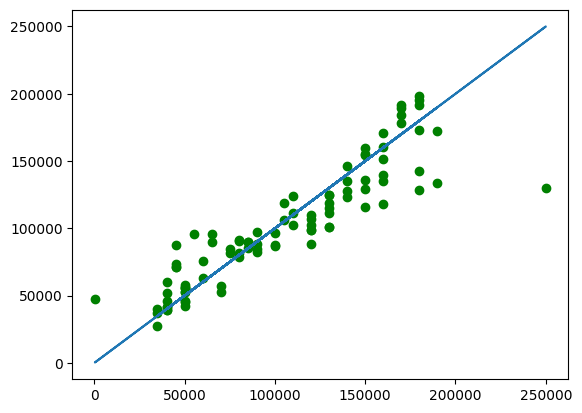

In [49]:
prediction_model_cv(RidgeCV)

The r2 score for the LassoCV(cv=KFold(n_splits=5, random_state=None, shuffle=False)) is 0.8073386497468932


c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


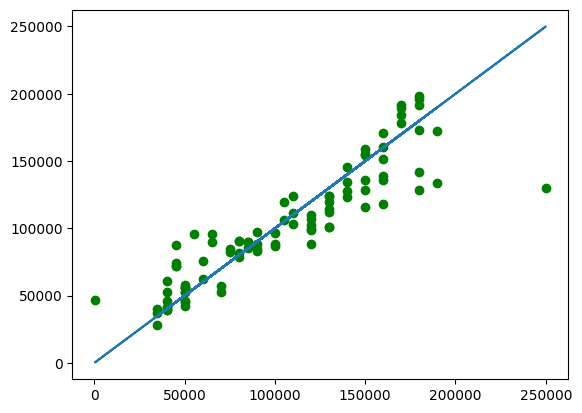

In [50]:
prediction_model_cv(LassoCV)

In [51]:
#The RidgeCV provides more accuarcy than LassoCV

In [52]:
svr=SVR()
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.5],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.1, 1]
}
param_grid

{'C': [0.1, 1, 10],
 'epsilon': [0.1, 0.5],
 'kernel': ['linear', 'rbf'],
 'gamma': ['scale', 0.1, 1]}

In [53]:
cv=KFold() #Cross validation used for regression problems whereas the StratifiedKfold is used for classification tasks
grid=GridSearchCV(estimator=svr,param_grid=param_grid,scoring='neg_mean_squared_error',cv=cv)


In [54]:
grid.fit(X_train,y_train)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mahap\OneDrive\Desktop\C++,JS python cod

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.5],
                         'gamma': ['scale', 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [55]:
grid.best_params_

{'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}

In [56]:
y_pred=grid.predict(X_test)
y_pred

array([ 99880.20019062, 101856.46145182, 108070.05320347,  94675.34097759,
        89704.45355299,  89666.8307456 , 102600.89266999,  90859.14722789,
        88906.14158372,  86062.30495983,  98929.28204578,  98055.04992655,
        94675.34097759, 103454.8505976 , 107771.54832612,  95103.4957443 ,
        87398.29453671,  97515.27518498, 108722.72278302,  95320.07991808,
       106251.19402694,  96022.84231473,  89704.45355299,  92506.24146664,
        98667.08911773,  87857.76446403, 102835.80118259, 107117.90496649,
       102015.37172896,  86387.82576295,  93614.61049486, 103571.06020616,
       103599.72153392, 107022.36229542,  88849.63561712,  93133.87034768,
        97884.27893127,  93905.5518671 ,  93103.25122134,  94383.0820671 ,
        87510.1170295 ,  88637.61809425,  97028.30162655,  95256.57456536,
        93880.96724263,  97188.94039521, 103753.14195225, 104757.51526968,
        98993.42390751, 109807.86463386,  91555.06700974,  93127.15676598,
        95003.99736644,  

The r2 score for SVR regression with grid search cv is 0.20192757515988324


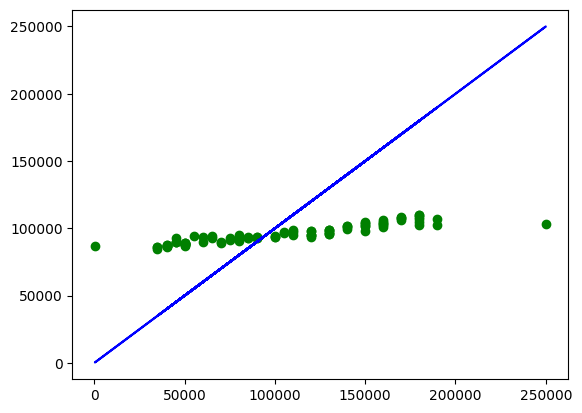

In [57]:
print(f"The r2 score for SVR regression with grid search cv is {r2_score(y_test,y_pred)}")
plt.scatter(y_test,y_pred,c='g')
plt.plot(y_test,y_test,'b')

In [58]:
ridgecv=RidgeCV(cv=cv)
ridgecv.fit(X_train,y_train)
y_pred=ridgecv.predict(X_test)
print(f"The r2 score for ridge cv is {r2_score(y_test,y_pred)}")

The r2 score for ridge cv is 0.8081490531259459


In [59]:
import pickle
with open('Salary_Prediction.pkl','wb') as file:
    pickle.dump(ridgecv,file)
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)
with open('Job_encoder.pkl','wb') as file:
    pickle.dump(encoder,file)
#The ridge cv object after it has fitted with X_train,y_train as it provides maximum accuracy in terms of r2 score,ridge cv object is dumped into hard disk for using it later in some other file